# 📖 Fichamento Capítulo 1: Sinais e Sistemas

> **Livro:** Oppenheim & Willsky - Signals and Systems  
> **Páginas:** 1-50  
> **Data:** [Data do fichamento]  
> **Objetivo:** Estabelecer fundamentos para análise de sinais de vibração em máquinas rotativas

---

## 🎯 **Objetivos do Capítulo**

1. **Definir sinais** e suas propriedades fundamentais
2. **Classificar sistemas** e suas características
3. **Estabelecer base matemática** para análise de sistemas
4. **Conectar teoria** com aplicações práticas em detecção de falhas


## 📖 **Resumo Conceitual**

### **Conceitos Principais:**

1. **Definição de Sinais:** Funções matemáticas que carregam informação
2. **Propriedades de Sinais:** Energia, potência, periodicidade, simetria
3. **Classificação de Sistemas:** Linear/não-linear, invariante/variante no tempo
4. **Sistemas com/sem memória:** Dependência do histórico de entrada
5. **Causalidade:** Dependência apenas de entradas passadas/presentes

### **Definições Fundamentais:**

- **Sinal:** Função de uma ou mais variáveis independentes que carrega informação
- **Sistema:** Entidade que processa sinais de entrada para produzir sinais de saída
- **Energia de um sinal:** $E = \int_{-\infty}^{\infty} |x(t)|^2 dt$
- **Potência de um sinal:** $P = \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^{T} |x(t)|^2 dt$

### **Teoremas Importantes:**

- **Teorema de Parseval:** Conservação de energia no domínio da frequência
- **Princípio da Superposição:** Base para sistemas lineares
- **Invariância no Tempo:** Propriedade fundamental de sistemas LTI


## 🔍 **Análise Crítica**

### **Limitações:**
- Foco em sinais determinísticos (limitação para sinais aleatórios)
- Não aborda explicitamente sinais não-estacionários
- Definições assumem sinais de energia finita

### **Aplicabilidade HOS:**
- **Moments e Cumulants:** Base para espectros de ordem superior
- **Não-linearidades:** Sistemas não-lineares são fundamentais para HOS
- **Propriedades estatísticas:** Essenciais para análise de ordem superior

### **Conexões:**
- **Cap. 2:** Sistemas LTI (base para análise de sistemas)
- **Cap. 3-4:** Análise de Fourier (transformação de sinais)
- **Cap. 5-6:** Transformada de Laplace (análise de sistemas)


## 💡 **Aplicações Práticas - Máquinas Rotativas**

### **Exemplos de Sinais de Vibração:**

1. **Sinal de Vibração de Eixo:** $x(t) = A\sin(2\pi f_0 t) + \text{ruído}$
2. **Sinal com Falha de Rolamento:** $x(t) = A\sin(2\pi f_0 t) + B\sin(2\pi f_{BPFO} t)$
3. **Sinal com Trinca:** $x(t) = A\sin(2\pi f_0 t) + C\sin(4\pi f_0 t)$ (harmônico)

### **Classificação de Sistemas:**
- **Linear:** Comportamento proporcional (sem saturação)
- **Não-linear:** Comportamento com saturação, histerese
- **Invariante no tempo:** Propriedades não mudam com o tempo
- **Variante no tempo:** Propriedades mudam (desgaste, temperatura)

### **Implementação Computacional:**
- **Amostragem:** Conversão de sinais contínuos para discretos
- **Quantização:** Representação digital com precisão finita
- **Processamento:** Análise em tempo real vs. off-line


## 🧮 **Exemplos Práticos com Python**

Vamos implementar exemplos práticos de sinais de vibração para máquinas rotativas:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns

# Configuração para plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Parâmetros de simulação
fs = 1000  # Frequência de amostragem (Hz)
t = np.linspace(0, 2, 2*fs)  # 2 segundos de sinal

print("📊 Simulação de Sinais de Vibração para Máquinas Rotativas")
print("=" * 60)


📊 Simulação de Sinais de Vibração para Máquinas Rotativas


### **1. Sinal de Vibração Normal (Sem Falhas)**


🔧 Sinal Normal:
   Frequência: 50 Hz
   Energia: 1.022 J
   Potência: 0.511 W


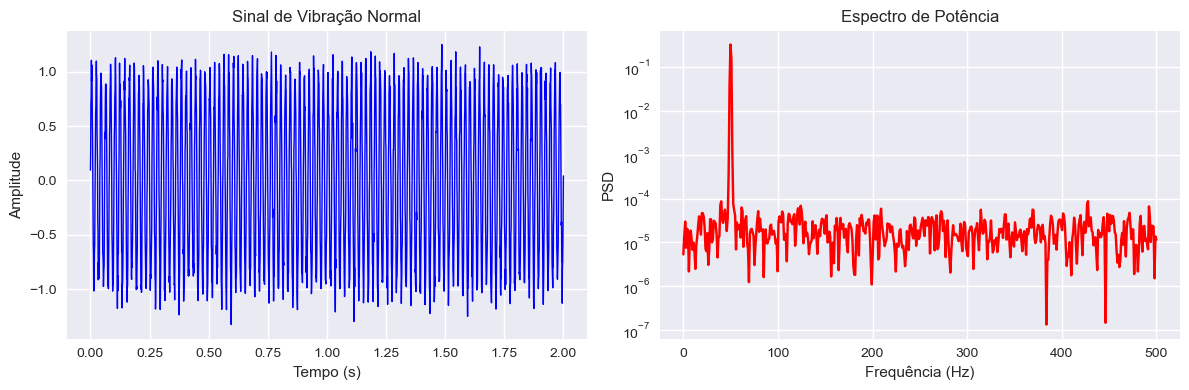

In [2]:
# Sinal de vibração normal
f0 = 50  # Frequência de rotação (Hz)
A = 1.0  # Amplitude
noise_level = 0.1

# Sinal principal + ruído
x_normal = A * np.sin(2 * np.pi * f0 * t) + noise_level * np.random.randn(len(t))

# Cálculo de energia e potência
energy_normal = np.sum(x_normal**2) / fs
power_normal = np.mean(x_normal**2)

print(f"🔧 Sinal Normal:")
print(f"   Frequência: {f0} Hz")
print(f"   Energia: {energy_normal:.3f} J")
print(f"   Potência: {power_normal:.3f} W")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x_normal, 'b-', linewidth=1)
plt.title('Sinal de Vibração Normal')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Espectro de frequência
freqs, psd = signal.welch(x_normal, fs, nperseg=1024)
plt.subplot(1, 2, 2)
plt.semilogy(freqs, psd, 'r-')
plt.title('Espectro de Potência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('PSD')
plt.grid(True)
plt.tight_layout()
plt.show()


### **2. Sinal com Falha de Rolamento (BPFO - Ball Pass Frequency Outer)**


⚠️  Sinal com Falha de Rolamento:
   Frequência principal: 50 Hz
   Frequência de falha: 120 Hz
   Energia: 1.108 J
   Potência: 0.554 W
   Aumento de energia: 8.4%


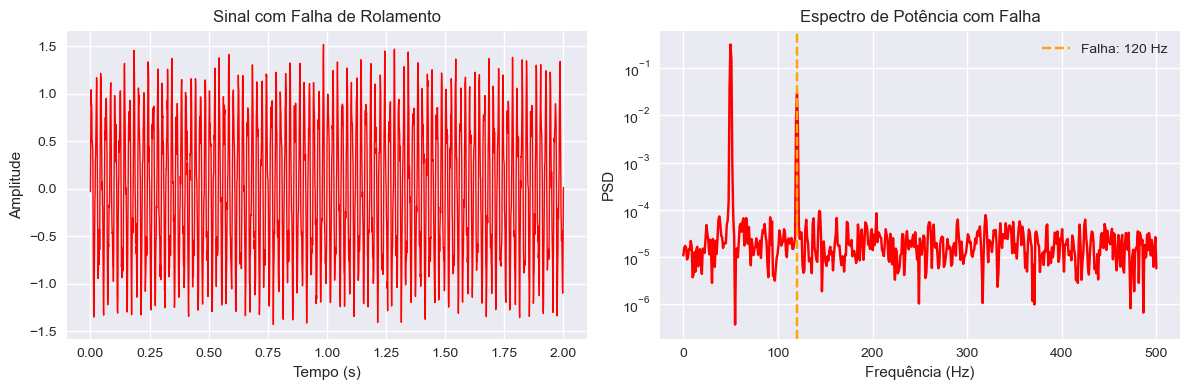

In [3]:
# Sinal com falha de rolamento
f_bpfo = 120  # Frequência característica da falha (Hz)
A_fault = 0.3  # Amplitude da falha

# Sinal com falha
x_fault = (A * np.sin(2 * np.pi * f0 * t) + 
           A_fault * np.sin(2 * np.pi * f_bpfo * t) + 
           noise_level * np.random.randn(len(t)))

# Cálculo de energia e potência
energy_fault = np.sum(x_fault**2) / fs
power_fault = np.mean(x_fault**2)

print(f"⚠️  Sinal com Falha de Rolamento:")
print(f"   Frequência principal: {f0} Hz")
print(f"   Frequência de falha: {f_bpfo} Hz")
print(f"   Energia: {energy_fault:.3f} J")
print(f"   Potência: {power_fault:.3f} W")
print(f"   Aumento de energia: {((energy_fault/energy_normal - 1)*100):.1f}%")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x_fault, 'r-', linewidth=1)
plt.title('Sinal com Falha de Rolamento')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Espectro de frequência
freqs, psd = signal.welch(x_fault, fs, nperseg=1024)
plt.subplot(1, 2, 2)
plt.semilogy(freqs, psd, 'r-')
plt.axvline(f_bpfo, color='orange', linestyle='--', label=f'Falha: {f_bpfo} Hz')
plt.title('Espectro de Potência com Falha')
plt.xlabel('Frequência (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
